In [1]:
# import sys
import sys
sys.path.append('./code')
import pandas as pd
from settings_abtest import TEST_PATH
print(f"TEST_PATH: {TEST_PATH}")

TEST_PATH: c:\Users\HP\Documents\ABTEST\data\test.csv


In [ ]:
# from utils import load_data, get_observed_counts, get_expected_counts, run_chi_square, run_proportions_ztest
import numpy as np
from settings_abtest import ALPHA, SRM_ALPHA, EXPERIMENT_NAME, PRETEST_PATH, TEST_PATH
from utils import load_data,run_chi_square, run_proportions_ztest,describe_dataset,get_experiment_parameters,plot_experiment_duration_by_traffic
from utils import check_missing_values,summarize_performance,plot_visits_per_day,plot_signup_rate_per_day,calculate_sample_size_and_plot
from utils import plot_experiment_duration_by_traffic_absolute,print_required_users_per_day
from settings_abtest import ALPHA, SRM_ALPHA, EXPERIMENT_NAME, PRETEST_PATH, TEST_PATH,ALPHA, POWER, P1, P2

# Load Data

In [3]:
# Load the data
test = load_data(TEST_PATH)
pretest = load_data(PRETEST_PATH)

c:\Users\HP\Documents\ABTEST\code\utils.py:246: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath)


In [4]:
test.head(5)
pretest.head(5)

,visitor_id,date,email,experiment,group,submitted
0,1,2021-12-01,NaN,NaN,NaN,0
1,2,2021-12-01,NaN,NaN,NaN,0
2,3,2021-12-01,NaN,NaN,NaN,0
3,4,2021-12-01,NaN,NaN,NaN,0
4,5,2021-12-01,NaN,NaN,NaN,0


# Describing the pretest dataset

In [5]:

# Describe dataset
describe_dataset(pretest)

# of rows: 309903
Date Range: 2021-12-01 - 2021-12-31


# Checking Missing Values

In [6]:
# Check for missing values
print("\n--- Missing Values ---")
check_missing_values(pretest)
check_missing_values(test)


--- Missing Values ---
Missing values (%):
visitor_id     0.000000
date           0.000000
email         89.901679
experiment    90.306967
group         90.306967
submitted      0.000000
dtype: float64
Missing values (%):
visitor_id     0.000000
date           0.000000
email         89.566945
experiment    78.507277
group          0.000000
submitted      0.000000
dtype: float64


visitor_id     0.000000
date           0.000000
email         89.566945
experiment    78.507277
group          0.000000
submitted      0.000000
dtype: float64

# Checking for performance of Present Dataset
#Let's get some data about the performance of pretest

#. A. How many visitors were there?

#. B. How many signups were there?

#. C. What was the signup rate?

In [7]:
print("\n--- Pretest Performance Summary ---")
summarize_performance(pretest)


--- Pretest Performance Summary ---
Total visitors count: 309903
Total signup count: 31295
Total signup rate: 0.1


(309903, 31295, 0.1)

# Plot Visitors Per day

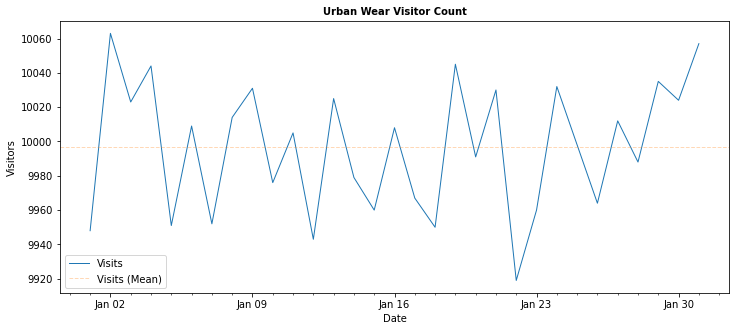

In [8]:
plot_visits_per_day(pretest)

# Plotting for Signup_rates

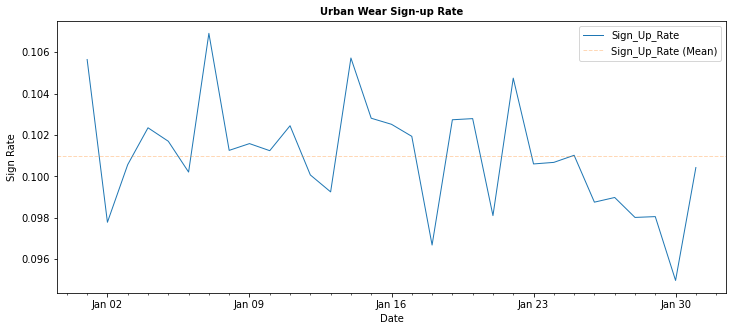

In [9]:

plot_signup_rate_per_day(pretest)

# State the Hypothesis
The second step of this experiment is to state the hypothesis. The next step will be to state the parameter for the experiment.

> * This includes (Significance level, statistical power, MDE)
> * Ho: The signup rates for the blue and green button are the same
> * Ha: The signup rates for the blue and green button are different.

# Printing experiment parameters

In [10]:
alpha, power, mde, p1, p2 = get_experiment_parameters()

# Step three - Design the Experiment
The third step of the experiment is the design phase, which involves determining the randomization unit, calculating the sample size, and determining the experiment duration. We will explore how to calculate the sample size and experiment duration in this section.

To detect an effect of 10.0% lift from the pretest sign-up at 10%, the sample size per group required is 15000.
The total sample required in the experiment is 30000.


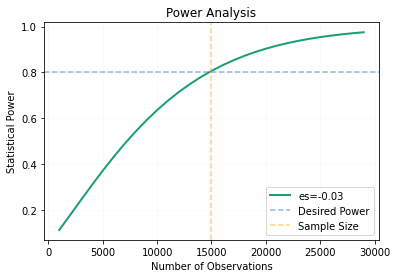

In [11]:
# from utils import calculate_sample_size_and_plot

n, _ = calculate_sample_size_and_plot(p1=P1, p2=P2, alpha=ALPHA, power=POWER)

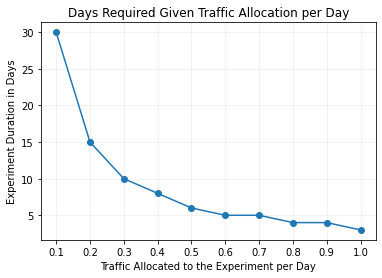

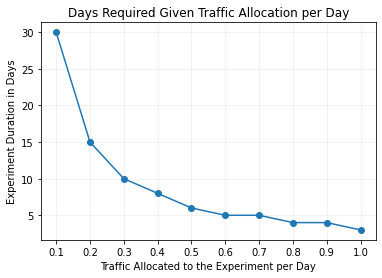

In [12]:
# Step 2: Compute visits_mean
visits_mean = pretest.groupby('date')['submitted'].count().mean()

# Step 3: Plot experiment duration using n (no power plot shown here)
plot_experiment_duration_by_traffic(n, visits_mean)

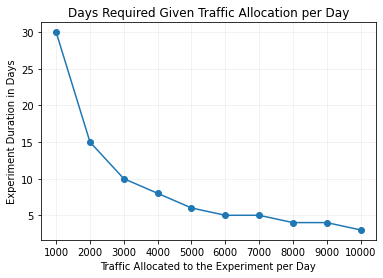

In [13]:
alloc = np.arange(0.10, 1.1, 0.10)
size = round(visits_mean, -3) * alloc
days = np.ceil(2 * n / size)
plot_experiment_duration_by_traffic_absolute(size, days)

In [ ]:

print_required_users_per_day(n)


Total sample size required: 30000
For a 21-day experiment, 1429 users are required per day.
For a 14-day experiment, 2143 users are required per day.
For a 7-day experiment, 4286 users are required per day.


In [ ]:
from utils import get_ab_group_metrics

(
    AB_test,
    AB_control_cnt,
    AB_treatment_cnt,
    AB_control_rate,
    AB_treatment_rate,
    AB_control_size,
    AB_treatment_size
) = get_ab_group_metrics(test)
